### 一端固定的弹簧简谐振子示意图

![har_osc_fixed](assets/Simple_harmonic_oscillator.gif)

In [3]:
"""一端固定的弹簧简谐振子的velocity verlet算法实现"""
# reference code: Lingti Kong's code

import numpy as np


def thermo_data(
    x: float,
    v: float,
    k: float = 1.0,
    mass: float = 1.0,
    step: int = 0,
    dt: float = 0.05,
):
    """计算热力学信息"""

    Ep = 0.5 * k * x**2
    Ek = 0.5 * mass * v**2
    Et = Ep + Ek

    return [step, step * dt, x, v, Ep, Ek, Et]


def Har_Osc_Fix():
    mass = 1.0
    k = 1.0
    x = 0.0
    f = -k * x
    v = 0.5
    a = f / mass

    period = 2.0 * np.pi * np.sqrt(mass / k)
    dt = 0.05
    half_dt = dt * 0.5
    nsteps = int(2.0 * period / dt)
    ioutput = 5

    thermo = []
    thermo_data_init = thermo_data(x, v)
    thermo.append(thermo_data_init)

    # velocity verlet算法实现
    for istep in range(1, nsteps + 1):
        v = v + a * half_dt
        x = x + v * dt
        f = -k * x
        a = f / mass
        v = v + a * half_dt

        # 每5步输出热力学信息
        if istep % ioutput == 0:
            thermo_data_step = thermo_data(x, v, step=istep)
            thermo.append(thermo_data_step)

    return thermo

In [5]:
# 不用科学计数法显示
np.set_printoptions(suppress=True)
thermo = np.array(Har_Osc_Fix()).round(5)
thermo

array([[  0.     ,   0.     ,   0.     ,   0.5    ,   0.     ,   0.125  ,
          0.125  ],
       [  5.     ,   0.25   ,   0.12375,   0.48445,   0.00766,   0.11735,
          0.125  ],
       [ 10.     ,   0.5    ,   0.23981,   0.43878,   0.02875,   0.09626,
          0.12502],
       [ 15.     ,   0.75   ,   0.34095,   0.36582,   0.05812,   0.06691,
          0.12504],
       [ 20.     ,   1.     ,   0.4209 ,   0.27011,   0.08858,   0.03648,
          0.12506],
       [ 25.     ,   1.25   ,   0.47466,   0.1576 ,   0.11265,   0.01242,
          0.12507],
       [ 30.     ,   1.5    ,   0.49891,   0.03529,   0.12446,   0.00062,
          0.12508],
       [ 35.     ,   1.75   ,   0.49213,  -0.08921,   0.1211 ,   0.00398,
          0.12508],
       [ 40.     ,   2.     ,   0.45475,  -0.20817,   0.1034 ,   0.02167,
          0.12506],
       [ 45.     ,   2.25   ,   0.38908,  -0.31418,   0.07569,   0.04935,
          0.12505],
       [ 50.     ,   2.5    ,   0.29923,  -0.40065,   0.0447

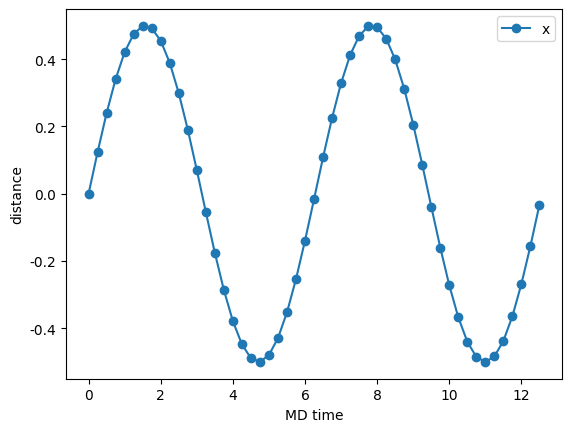

In [6]:
import matplotlib.pyplot as plt

plt.xlabel("MD time")
plt.ylabel("distance")
plt.plot(thermo[:, 1], thermo[:, 2], marker="o", label="x")

plt.legend()

plt.show()

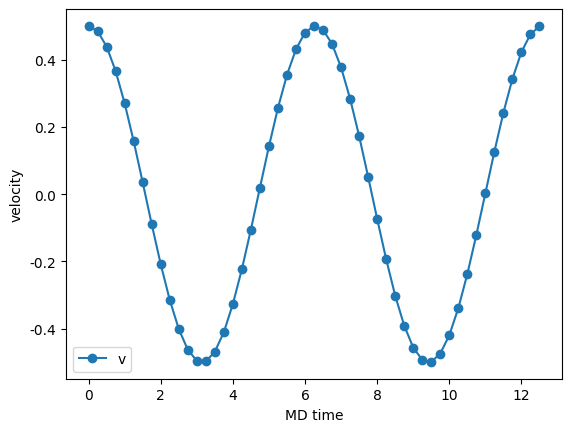

In [7]:
plt.xlabel("MD time")
plt.ylabel("velocity")
plt.plot(thermo[:, 1], thermo[:, 3], marker="o", label="v")

plt.legend()

plt.show()

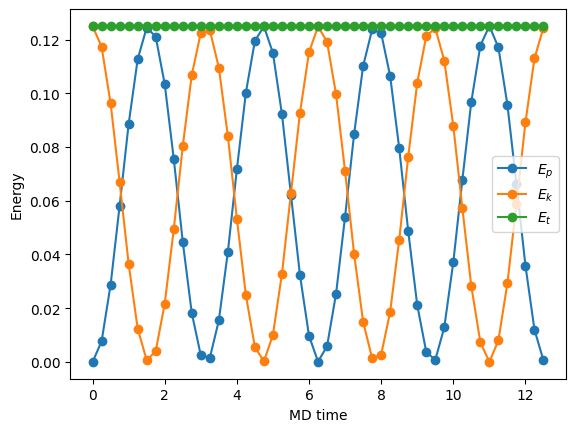

In [11]:
plt.xlabel("MD time")
plt.ylabel("Energy")
plt.plot(thermo[:, 1], thermo[:, 4], marker="o", label="$E_p$")
plt.plot(thermo[:, 1], thermo[:, 5], marker="o", label="$E_k$")
plt.plot(thermo[:, 1], thermo[:, 6], marker="o", label="$E_t$")

plt.legend()

plt.show()